# Calculus Using Sympy

In [120]:
import sympy as sm
import numpy as np
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

## Limits

In [2]:
x, y = sm.symbols('x, y')

In [3]:
f = sm.sin(x/2 + sm.sin(x))
f

sin(x/2 + sin(x))

In [4]:
sm.limit(f, x, sm.pi)

1

In [5]:
f = 2*sm.exp(1/x) / (sm.exp(1/x)+1)
f

2*exp(1/x)/(exp(1/x) + 1)

In [6]:
sm.limit(f, x, 0, dir='+')

2

In [7]:
sm.limit(f, x, 0, dir='-')

0

In [8]:
f = (sm.cos(x) - 1)/x
f

(cos(x) - 1)/x

In [9]:
sm.limit(f, x, sm.oo)

0

## Derivatives

In [10]:
f = ((1+sm.sin(x))/(1-sm.cos(x)))**2
f

(sin(x) + 1)**2/(1 - cos(x))**2

In [11]:
sm.diff(f, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [12]:
f = (sm.log(x, 5))**(x/2)
f

(log(x)/log(5))**(x/2)

In [13]:
sm.diff(f, x)

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

In [14]:
# Option 1
f, g = sm.symbols('f, g', cls=sm.Function)

g = g(x)
f = f(x+g)


# # Option 2
# f, g = sm.symbols('f, g')

# g = sm.Function(g)(x)
# f = sm.Function(f)(x+g)

f

f(x + g(x))

In [15]:
sm.diff(f, x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

## Basic Antiderivatives

In [16]:
f = sm.csc(x)*sm.cot(x)
f

cot(x)*csc(x)

In [17]:
sm.integrate(f, x)

-1/sin(x)

In [18]:
f = 4*sm.sec(3*x)*sm.tan(3*x)
f

4*tan(3*x)*sec(3*x)

In [19]:
sm.integrate(f, x)

4/(3*cos(3*x))

In [20]:
f = 2/(sm.sqrt(1-x**2)) - 1/(x**sm.Rational(1,4))
f

2/sqrt(1 - x**2) - 1/x**(1/4)

In [21]:
sm.integrate(f, x)

-4*x**(3/4)/3 + 2*asin(x)

## More Complicated Expressions

In [22]:
f = (1+sm.sqrt(x))**sm.Rational(1, 3)/sm.sqrt(x)
f

(sqrt(x) + 1)**(1/3)/sqrt(x)

In [23]:
sm.integrate(f, x)

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

In [24]:
f  = x*(1-x**2)**sm.Rational(1/4)
f

x*(1 - x**2)**(1/4)

In [25]:
sm.integrate(f, x)

2*x**2*(1 - x**2)**(1/4)/5 - 2*(1 - x**2)**(1/4)/5

In [26]:
f = (2*x - 1)*sm.cos(sm.sqrt(3*(2*x - 1)**2 + 6)) / sm.sqrt(3*(2*x - 1)**2 + 6)
f

(2*x - 1)*cos(sqrt(3*(2*x - 1)**2 + 6))/sqrt(3*(2*x - 1)**2 + 6)

In [27]:
sm.integrate(f)

sin(sqrt(3*(2*x - 1)**2 + 6))/6

## Definite Integrals

In [28]:
f = sm.exp(x)/sm.sqrt(sm.exp(2*x)+9)
f

exp(x)/sqrt(exp(2*x) + 9)

In [29]:
sm.integrate(f, (x, 0, sm.log(4)))

-asinh(1/3) + asinh(4/3)

In [30]:
f = x**10*sm.exp(x)
f

x**10*exp(x)

In [31]:
t = sm.symbols('t')

sm.integrate(f, (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Improper Integrals

In [32]:
f = 16*sm.atan(x)/(1+x**2)
f

16*atan(x)/(x**2 + 1)

In [33]:
sm.integrate(f, (x, 0, sm.oo))

2*pi**2

## Sequences and Series

In [34]:
n = sm.symbols('n')

In [35]:
f = 6/4**n
f

6/4**n

In [36]:
sm.Sum(f, (n, 0, sm.oo))

Sum(6/4**n, (n, 0, oo))

In [37]:
sm.Sum(6/4**n, (n, 0, sm.oo)).doit()

8

In [38]:
f = 2**(n+1)/5**n
f

2**(n + 1)/5**n

In [39]:
sm.Sum(f, (n, 0, sm.oo))

Sum(2**(n + 1)/5**n, (n, 0, oo))

In [40]:
sm.Sum(f, (n, 0, sm.oo)).doit()

10/3

In [41]:
f = sm.atan(n)/n**1.1
f

atan(n)/n**1.1

In [42]:
sm.Sum(f, (n, 1, sm.oo))

Sum(atan(n)/n**1.1, (n, 1, oo))

In [43]:
sm.Sum(f, (n, 1, sm.oo)).doit() #Solution diverges and requires numerical solution

Sum(atan(n)/n**1.1, (n, 1, oo))

In [44]:
f = (1 + sm.cos(n))/n**2
f

(cos(n) + 1)/n**2

In [45]:
sm.Sum(f, (n, 1, sm.oo))

Sum((cos(n) + 1)/n**2, (n, 1, oo))

In [46]:
sm.Sum(f, (n, 1, sm.oo)).n()

1.969

## Vectors and Geometry

In [47]:
x, y, z = sm.symbols('x, y, z')
u1, u2, u3 = sm.symbols('u_1, u_2, u_3')
v1, v2, v3 = sm.symbols('v_1, v_2, v_3')

In [48]:
# Numeric or symbolic

a = np.array([1, 2, 3])
b = np.array([7, 8, 9])
u = sm.Matrix([u1, u2, u3])
v = sm.Matrix([v1, v2, v3])

In [49]:
2*a+b

array([ 9, 12, 15])

In [50]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

### Dot Products

In [51]:
np.dot(a, b)

50

In [52]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [53]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

### Length of Vector

In [54]:
np.linalg.norm(a)

3.7416573867739413

In [55]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

### Vector Projection

In [56]:
proj_b_a = np.dot(a, b)/np.linalg.norm(b)**2 * b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

In [57]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

### Lines/Planes in Space

In [58]:
r0 = sm.Matrix([1, 1, 1])
v = sm.Matrix([1, 3, -1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

In [59]:
P0= sm.Matrix([4, 4, 8])
r = sm.Matrix([x, y, z])
n = sm.Matrix([1, 1, 1])

n.dot(P0-r)

-x - y - z + 16

In [60]:
# Find vector parallel to the line of intersection of the two
# planes 3x - 67 - 2z = 15 and 2x + y 2z = 5
# (It's going to be perpendicular to both normal vectors)

n1 = np.array([-3, 6, 2])
n2 = np.array([-2,-1, 2])
ans = np.cross(n1, n2)
ans

n1 = np.array([-3, 6, 2])
n2 = np.array([-2,-1, 2])
ans = np.cross(n1, n2)
ans

array([14,  2, 15])

## Vector Calculus

### Vector Derivatives

In [61]:
r = sm.Matrix([3*t, sm.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [62]:
sm.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

In [67]:
# Find the angle between the velocity and acceleration as a function of time theta

v = sm.diff(r, t)
a = sm.diff(v, t)
theta = sm.acos(v.dot(a)/(v.norm()*a.norm())).simplify()

In [68]:
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [69]:
theta.subs(t, 6)

acos((24 - sin(12)/2)/(sqrt(sin(6)**2 + 4)*sqrt(cos(6)**2 + 153)))

In [70]:
theta.subs(t, 6).evalf()

0.251108015692338

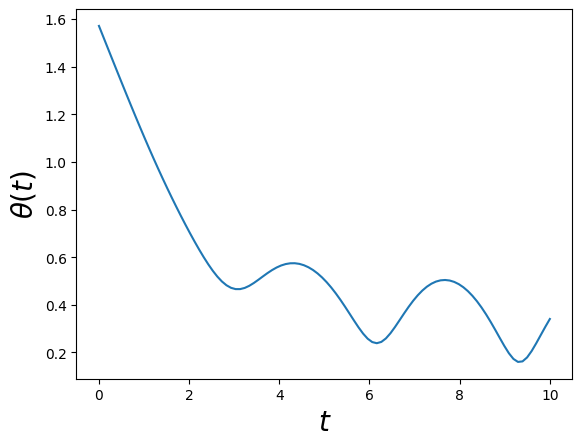

In [76]:
tt = np.linspace(0, 10, 100)
aa = sm.lambdify([t], theta)(tt)
plt.plot(tt,aa)
plt.xlabel('$t$', fontsize=20)
plt.ylabel(r'$\theta(t)$', fontsize=20)
plt.show()

### Vector Integrals

In [77]:
r = sm.Matrix([sm.exp(t)*sm.cos(t), t**4, 1/(1 + t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [78]:
sm.Integral(r)

Integral(Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]]), t)

In [79]:
sm.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [80]:
# In some cases integrals cannot be evaluated symbolically: must solve definite integrals numerically

r = sm.Matrix([sm.exp(t**2)*sm.cos(t)**3, sm.exp(-t**4), 1/(t**2 + 3)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [85]:
r_num = sm.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

### Arclength

In [86]:
# Find arclength of <0, t, t^2> from t=0 to t=1

r = sm.Matrix([0, t, t**2])
sm.integrate(sm.diff(r, t).norm(), (t, 0, 1))

asinh(2)/4 + sqrt(5)/2

In [90]:
# In most cases needs to be done numerically. Find arclength of <e^t, sin(t), t^4> from t=0 to t=1

r = sm.Matrix([sm.exp(t), sm.sin(t), t**4])
r_num = sm.lambdify([t], sm.diff(r, t).norm())
quad(r_num, 0, 1)[0]

2.316977146444862

### Other Relevant Quantities

If $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element $ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } = |d\vec{r}/dt| = |\vec{v}|$ then the other quantities of importance are

* Unit Tangent vector: $\vec{T} = \frac{d\vec{r}}{dt}\frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}|$ 
* Curvature: $\kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|}$
* Unit normal vector to Curve: $\vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|}$

**Example** Find all these for $\vec{r}(t) = \left<a\cos(t)e^t, b\sin(t), ct\right>$

In [91]:
t, a, b, c = sm.symbols('t, a, b, c', positive=True, real=True)

In [93]:
# Define the path

r = sm.Matrix([a*sm.cos(t)*sm.exp(t), b*sm.sin(t), c*t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

In [95]:
# Define velocity vector v and speed abs(v)

v = sm.diff(r, t)
v_norm = v.norm()

In [96]:
# Get T, K and N

T = v/v_norm
kappa = sm.diff(T, t).norm()/v_norm
N = sm.diff(T, t)/sm.diff(T, t).norm()

In [97]:
# We can evaluate these quantities or make plots

kappa.subs([(t, 2), (a, 3), (b, 4), (c, 5)]).evalf()

0.00775458595406284

In [98]:
N.subs([(t, 2), (a, 3), (b, 4), (c, 5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

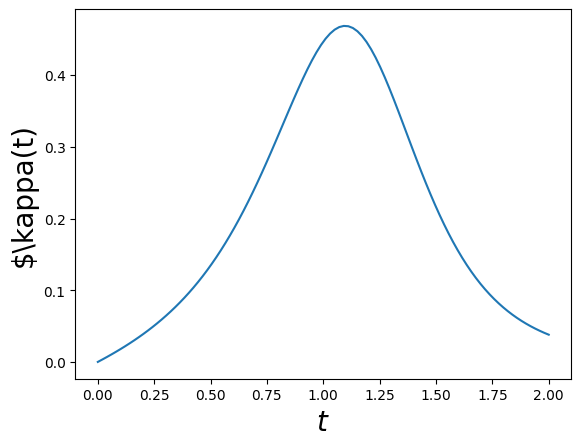

In [100]:
# We can also make continuous plots

kappa_num = sm.lambdify([t, a, b, c], kappa)

tt = np.linspace(0, 2, 100)
kk = kappa_num(tt, 1, 2, 3)
plt.plot(tt, kk)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$\kappa(t)', fontsize=20)
plt.show()

## Partial Derivatives

### Basics

In [102]:
# Partial derivatives df/dx and df/dy of f(x, y) = y^2sin(x+y)

f = y**2 * sm.sin(x + y)
f

y**2*sin(x + y)

In [103]:
sm.diff(f, x)

y**2*cos(x + y)

In [104]:
sm.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

In [105]:
# Or more complicated things like d3f/dxy2

sm.diff(f, x, y, y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### The Chain Rule

In [125]:
t = sm.symbols('t')
x, y, z = sm.symbols('x, y, z', cls=sm.Function)
w, v = sm.symbols('w, v', cls=sm.Function)

In [126]:
# Suppose x, y and z are function of t
# w is a function of x, y, and z i.e w= w(x, y, z)

#find dw/dt

x = x(t)
y = y(t)
z = z(t)

w = w(x, y, z)

In [127]:
sm.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [131]:
# Or put in specific functions

w1 = x**2+sm.exp(y)*sm.sin(z)
dwdt = sm.diff(w1, t)
dwdt

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [133]:
dwdt.subs([(x, sm.sin(t)), (y, sm.cos(t)), (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Gradients

Gradients: $\nabla f$. Now we are dealing with particular coordinate systems, so we must be careful:

In [138]:
C = CoordSys3D('')

In [139]:
f = C.x*sm.sin(C.y)
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [140]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [142]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

### Directional Derivatives

Directional derivatives $D_u f = \nabla f \cdot u$

In [143]:
u = 4*C.i - 3*C.j + 2*C.k

u

4*.i + (-3)*.j + 2*.k

In [144]:
# Make into unit vector
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [146]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

### Extreme Values and Saddle Points

Extreme values of $f(x,y)$ can occur at

* 1. Boundary points of the domain of $f$
* 2. Critical Points ($f_x=f_y=0$)

If

* (i) $f_{xx}<0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local maximum**
* (ii) $f_{xx}>0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local minimum**
* (iii) $f_{xx}f_{yy} - f_{xy}^2 < 0$ at (a,b) then **saddle point**
* (iv) $f_{xx}f_{yy} - f_{xy}^2 = 0$ at (a,b) then **inconclusive**

In [147]:
x, y = sm.symbols('x, y', real=True)
f = x**3 + 3*x*y + y**3
f

x**3 + 3*x*y + y**3

In [149]:
sm.solve([sm.diff(f, x), sm.diff(f, y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [150]:
fxx = sm.diff(f, x, x)
fyy = sm.diff(f, y, y)
fxy = sm.diff(f, x, y)

In [151]:
# Testing the first point

fxx.subs([(x, -1), (y, -1)])

-6

In [152]:
test = fxx*fyy - fxy**2
test.subs([(x, -1), (y, -1)])

27

## Lagrange Multipliers

Minimize $f(x,y,z)$ subject to the constraint $g(x,y,z)=0$

* Requires solving the two equations $\nabla f = \lambda \nabla g$ and $g(x,y,z)=0$

**Example**: A space probe has the shape of an ellipsoid $4x^2 + y^2 + 4z^2 = 16$ and after sitting in the sun for an hour. the temperature on its surface is given by $T(x,y,z)=8x^2+4yz-16z+600$. Find the hottest point on the surface

Note that $g=4x^2 + y^2 + 4z^2 - 16 = 0$ and $f=T = 8x^2+4yz-16z+600$ here

In [153]:
C = CoordSys3D('')

In [155]:
lam = sm.symbols('\lambda')
lam

\lambda

In [156]:
g = 4*C.x**2 + C.y**2 + 4*C.z**2 - 16
f = 8*C.x**2 + 4*C.y*C.z - 16*C.z + 600

g

4*.x**2 + .y**2 + 4*.z**2 - 16

In [157]:
f

8*.x**2 + 4*.y*.z - 16*.z + 600

In [159]:
eq1 = gradient(f) - lam*gradient(g)
eq1 = eq1.to_matrix(C)

eq1

Matrix([
[   -8*.x*\lambda + 16*.x],
[    -2*.y*\lambda + 4*.z],
[4*.y - 8*.z*\lambda - 16]])

In [160]:
eq2 = g
eq2

4*.x**2 + .y**2 + 4*.z**2 - 16

In [161]:
sols = sm.solve([eq1, eq2])
sols

[{.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2},
 {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)},
 {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)},
 {.x: 0, .y: 4, .z: 0, \lambda: 0},
 {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}]

In [162]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


First and last solutions are the points where the probe is the hottest

## Multiple Integrals

In [163]:
# In rare cases these can be done symbolically

x, y, z = sm.symbols('x, y, z')
f = x
sm.integrate(f, (z, 3, 4 - x**2 - y**2), (y, 0, 1 - x**2), (x, 0, 1))

1/8

In [166]:
# But most of the time need to be done numerically

# Wont Run!!
# x, y, z = sm.symbols('x, y, z')
# f = x*sm.exp(-y)*sm.cos(z)
# sm.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

In [168]:
from scipy.integrate import tplquad

In [169]:
f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f, 0, 1,
       lambda x: 0, lambda x: 1 - x**2,
       lambda x, y: 3, lambda x, y: 4 - x**2 - y**2)[0]

-0.09109526451447894

## Integrals and Vector Fields

### Line Integrals (Scalar)

In [173]:
t = sm.symbols('t', real=True)
x, y, z, f = sm.symbols('x, y, z, f', cls=sm.Function, real=True)

x = x(t)
y = y(t)
z = z(t)
r = sm.Matrix([x, y, z])
f = f(x, y, z)

In [174]:
integrand = f*sm.diff(r, t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [175]:
integrand1 = integrand.subs([(f, 2*x*y + sm.sqrt(z)),
                            (x, sm.cos(t)),
                            (y, sm.sin(t)),
                            (z, t)]).doit().simplify()

sm.integrate(integrand1, (t, 0, 2*sm.pi))

sqrt(2)/2 + sqrt(2)*(-1/2 + 4*sqrt(2)*pi**(3/2)/3)

In [178]:
integrand2 = integrand.subs([(f, 2*x*y+sm.sqrt(z)),
                            (x, 3*sm.cos(t)),
                            (y, sm.sin(t)),
                            (z, sm.exp(t/4))]).doit().simplify()

integrand2

(exp(t/8) + 3*sin(2*t))*sqrt(exp(t/2) + 128*sin(t)**2 + 16)/4

In [179]:
# Do it numerically using scipy's quad function

integrand2_num = sm.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

21.055300456759795

### Line Integrals (Vector)

In [181]:
t = sm.symbols('t', real=True)
x, y, z, F1, F2, F3 = sm.symbols('x y z F_1, F_2, F_3', cls=sm.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = sm.Matrix([x, y, z])
F = sm.Matrix([F1, F2, F3])

In [182]:
integrand = F.dot(sm.diff(r, t))
integrand

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

In [183]:
integrand1 = integrand.subs([(F1, sm.sqrt(z)),
                             (F2, -2*x),
                             (F3, sm.sqrt(y)),
                             (x, t),
                             (y, t**2),
                             (z, t**4)]).doit().simplify()

integrand1

t**2*(4*t*Abs(t) - 3)

In [184]:
sm.integrate(integrand1, (t, 0, 1))

-1/5

In [186]:
# Often times can't be done by hand and one needs to evaluate numerically using scipy

integrand2 = integrand.subs([(F1, sm.sqrt(sm.Abs(z))),
                             (F2, -2*x),
                             (F3, sm.sqrt(sm.Abs(y))),
                             (x, 3*sm.cos(t)**2),
                             (y, t**2),
                             (z, 2*sm.sin(t))]).doit().simplify()

integrand2

2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t)

In [187]:
integrand2_num = sm.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

-118.4352528130723

### Surface Integrals (Scalar)

Area of a surface parameterized by $\vec{r}(u,v)$ is given by 

$$A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

The surface integral of a scalar function $G(\vec{r})$ is given by

$$\iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose the surface density is given by $G(x,y,z)=x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$

In [189]:
rho, the = sm.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G = sm.symbols('x y z G', cls=sm.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G = G(x,y,z)
r = sm.Matrix([x, y, z])

In [190]:
integrand = G*sm.diff(r,rho).cross(sm.diff(r,the)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [191]:
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*sm.cos(the)),
                             (y, rho*sm.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [193]:
sm.integrate(integrand1, (the, 0, 2*sm.pi), (rho, 0, 1))

pi/60 + 5*sqrt(5)*pi/12

In [194]:
#Needs to be done numerically

### Surface Integrals (Vector)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by

$$\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv$$

This is also know as the flux of the vector field $\vec{G}$ through the surface

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose a vector field is given by $\vec{G}(x,y,z)=\left<y^2, z, 0 \right>$. Find the flux of $\vec{G}$ through half the surface for $0<\rho<1$ and $0<\theta<\pi$

In [196]:
rho, the = sm.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G1, G2, G3 = sm.symbols('x y z G_1, G_2, G_3', cls=sm.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x,y,z)
G2 = G2(x,y,z)
G3 = G3(x,y,z)
r = sm.Matrix([x, y, z])
G = sm.Matrix([G1, G2, G3])

In [197]:
integrand = G.dot(sm.diff(r,rho).cross(sm.diff(r,the)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [198]:
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*sm.cos(the)),
                             (y, rho*sm.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [199]:
sm.integrate(integrand1, (the, 0, sm.pi), (rho, 0, 1))

-4/5